In [1]:
import imutils
import cv2 as cv
import numpy as np
import random as rng
from matplotlib import pyplot as plt
plt.rcParams['figure.figsize'] = [18, 10]

In [7]:
def contourDetection(closing):
    # convert the image to grayscale format
    img_gray = cv.cvtColor(closing, cv.COLOR_BGR2GRAY)

    # apply binary thresholding
    ret, thresh_gray = cv.threshold(img_gray, 200, 255, cv.THRESH_BINARY)
    
    # detect the contours on the binary image using cv2.CHAIN_APPROX_NONE
    _, contours, hierarchy = cv.findContours(image=thresh_gray, mode=cv.RETR_EXTERNAL, method=cv.CHAIN_APPROX_NONE)
    
    # sort the contours according to the provided method
    (contours, boundingBoxes) = sort_contours(contours)
    
    cnt = []
    for i in range(len(contours)):
        if cv.contourArea(contours[i]) > 0:
            cnt.append(contours[i])
    print("Blob trovati: {}\n".format(len(cnt)))
    
    # draw contours on the original image
    src_copy1 = src.copy()
    cv.drawContours(image=src_copy1, contours=cnt, contourIdx=-1, color=(0, 255, 0), thickness=3, lineType=cv.LINE_AA)

    # Show in a window
    print("dtype: {}".format(src_copy1.dtype))
    print("shape: {}".format(src_copy1.shape))
    plt.imshow(src_copy1)
    plt.show()
    
    # draw Bounding Rectangle on the original image
    src_copy2 = src.copy()
    
    # Straight Bounding Rotated Rectangle
    for i in range(len(cnt)):
        rect = cv.minAreaRect(cnt[i])
        box = cv.boxPoints(rect)
        box = np.int0(box)
        cv.drawContours(src_copy2, [box], 0, (0, 255, 0), 2)

    # Show in a window
    print("\ndtype: {}".format(src_copy2.dtype))
    print("shape: {}".format(src_copy2.shape))
    plt.imshow(src_copy2)
    plt.show()
    
    # draw only contours
    drawing = np.zeros((thresh_gray.shape[0], thresh_gray.shape[1], 3), dtype=np.uint8)
    for i in range(len(cnt)):
        color = (rng.randint(0,256), rng.randint(0,256), rng.randint(0,256))
        cv.drawContours(drawing, cnt, i, color, 2, cv.LINE_8, hierarchy, 0)
        x, y, w, h = cv.boundingRect(cnt[i])
        cv.putText(drawing, "{}".format(i), (int(x+(w/2)), int(y+(h/2))), cv.FONT_HERSHEY_SIMPLEX, 0.9, (0, 255, 0), 2)

    # Show in a window
    print("\ndtype: {}".format(drawing.dtype))
    print("shape: {}".format(drawing.shape))
    plt.imshow(drawing)
    plt.show()
    
    return cnt

def sort_contours(cnts, method="left-to-right"):
    # initialize the reverse flag and sort index
    reverse = False
    i = 0

    # handle if we need to sort in reverse
    if method == "right-to-left" or method == "bottom-to-top":
        reverse = True

    # handle if we are sorting against the y-coordinate rather than
    # the x-coordinate of the bounding box
    if method == "top-to-bottom" or method == "bottom-to-top":
        i = 1

    # construct the list of bounding boxes and sort them from top to
    # bottom
    boundingBoxes = [cv.boundingRect(c) for c in cnts]
    (cnts, boundingBoxes) = zip(*sorted(zip(cnts, boundingBoxes),
        key=lambda b:b[1][i], reverse=reverse))

    # return the list of sorted contours and bounding boxes
    return (cnts, boundingBoxes)

dtype: uint8
shape: (2238, 1822, 3)


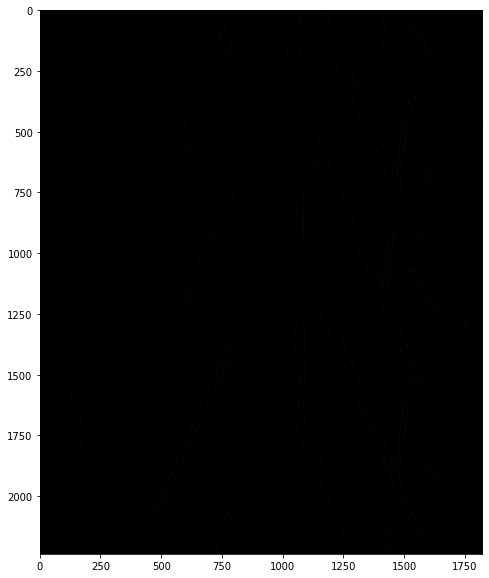

In [3]:
src = cv.imread("2022_04_03_00_28_42_image.jpg")

# Show in a window
print("dtype: {}".format(src.dtype))
print("shape: {}".format(src.shape))
plt.imshow(src)
plt.show()

dtype: uint8
shape: (2238, 1822, 3)


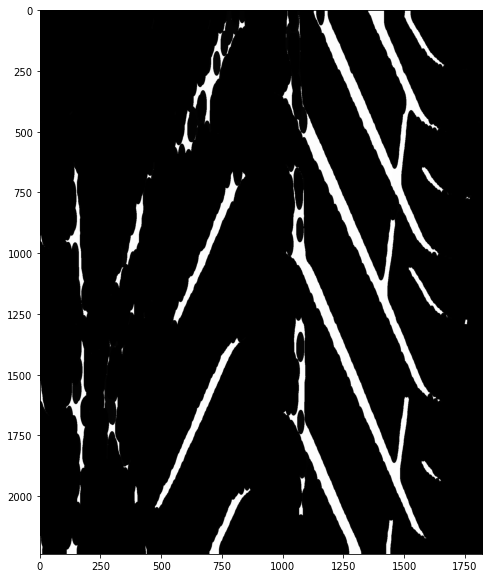

In [5]:
kernel_blob = cv.getStructuringElement(cv.MORPH_ELLIPSE, (30, 100))
closing_blob = cv.morphologyEx(src, cv.MORPH_CLOSE, kernel_blob)

# Show in a window
print("dtype: {}".format(closing_blob.dtype))
print("shape: {}".format(closing_blob.shape))
plt.imshow(closing_blob)
plt.show()

Blob trovati: 60

dtype: uint8
shape: (2238, 1822, 3)


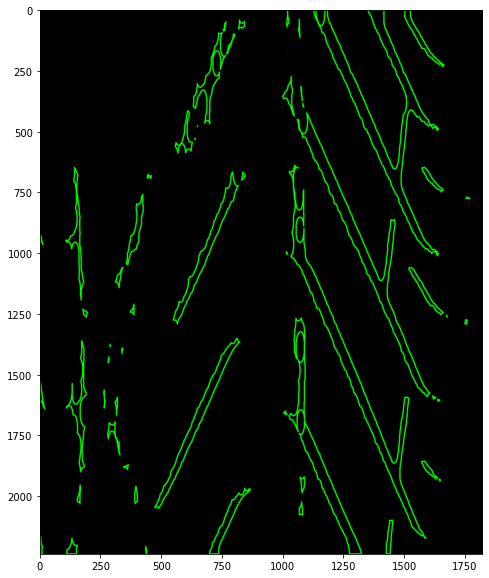


dtype: uint8
shape: (2238, 1822, 3)


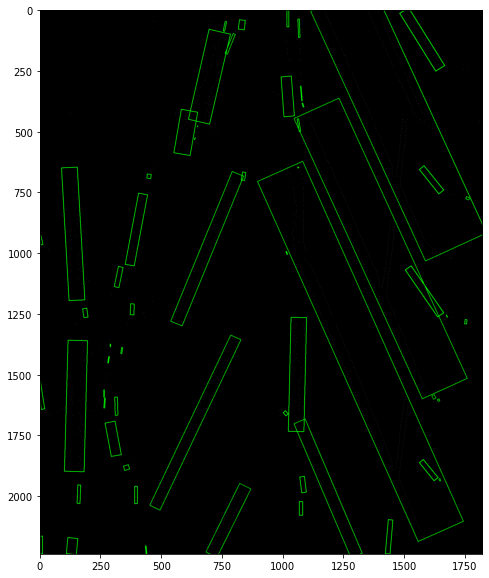


dtype: uint8
shape: (2238, 1822, 3)


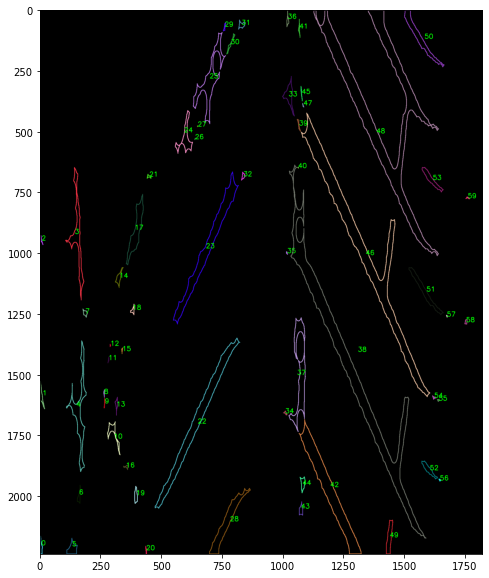

In [8]:
contours_blob = contourDetection(closing_blob)